**Contents**
1. Import Libraries and Read Dataset
1. Exploratory Data Analysis
1. Cohort Analysis
    * What is cohort analysis?
    * Cohort Analysis with Python
1. RFM Analysis for Customer Segmentation
    * What is RFM Analysis
    * RFM Analysis with Python
1. K-Means Clustering

## Import Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import os
# print(os.listdir("../input"))
path=os.environ['USERPROFILE']+r'\OneDrive\BDA2'



In [2]:
df = pd.read_excel(path+r'\data\Online Retail.xlsx')

## Exploratory Data Analysis

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [5]:
df['SalesAmount']=df['Quantity']*df['UnitPrice']


In [6]:
def monthly(x):
    return dt.datetime(x.year, x.month, 1)

In [7]:
from datetime import datetime
monthly(datetime.fromisoformat('2010-12-26 08:26:00'))

datetime.datetime(2010, 12, 1, 0, 0)

1, divide and conquer , 2, help() , 3, ChatGPT , 4, google

In [8]:
df['InvoiceDate'].apply(monthly)

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [9]:
df['BillMonth'] = df['InvoiceDate'].apply(monthly)

In [10]:
df_sum = df.groupby('BillMonth').sum().drop('CustomerID', axis = 1)


In [11]:
df_sum

,Quantity,UnitPrice,SalesAmount
BillMonth,,,
2010-12-01,342228,260520.850,748957.020
2011-01-01,308966,172752.800,560000.260
2011-02-01,277989,127448.770,498062.650
2011-03-01,351872,171486.510,683267.080
2011-04-01,289098,129164.961,493207.121
2011-05-01,380391,190685.460,723333.510
2011-06-01,341623,200717.340,691123.120
2011-07-01,391116,171906.791,681300.111
2011-08-01,406199,150385.680,682680.510


In [ ]:
# df_sum = df_sum.rename(columns={'SalesAmount' : 'GrossProfit'})

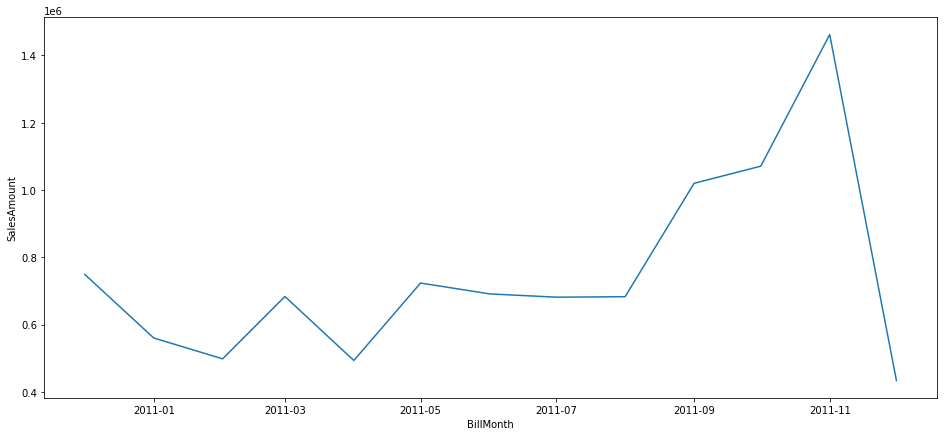

In [12]:
plt.figure(figsize=(16,7))
sns.lineplot(x = df_sum.index, y = df_sum['SalesAmount'])
plt.show()

In [13]:
df['Description'].value_counts()[:20]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: Description, dtype: int64

In [14]:
most_selling_products = df['Description'].value_counts()[:20]

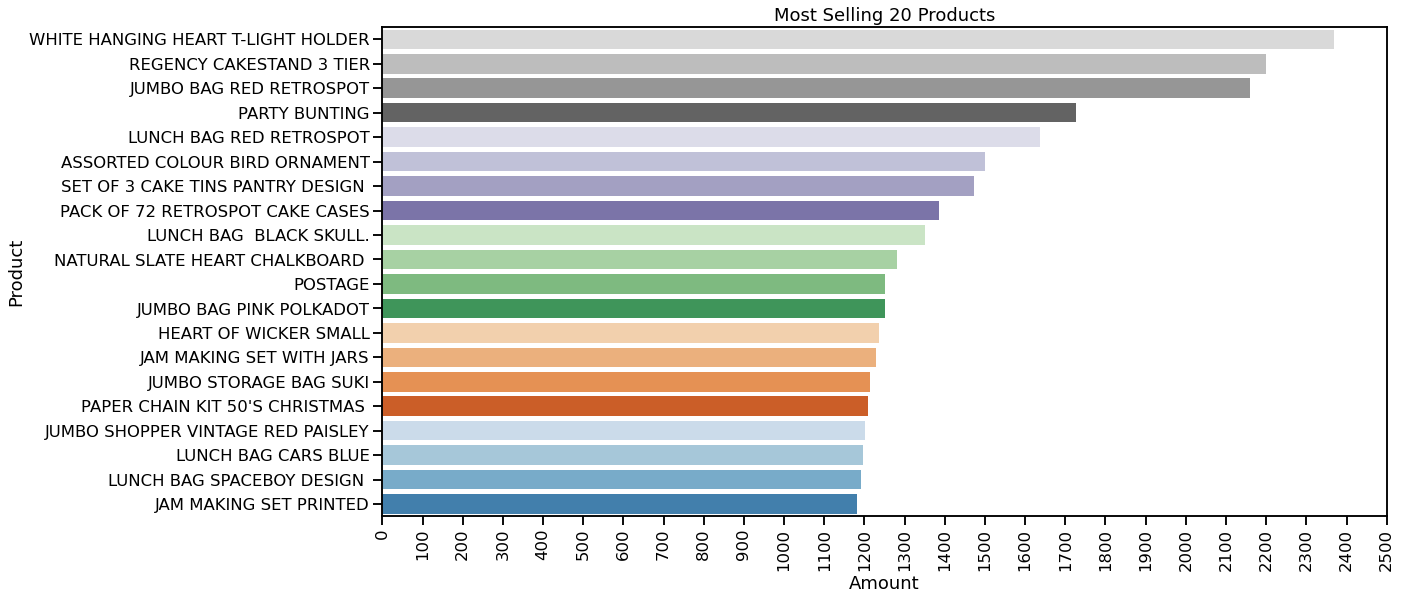

In [15]:
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = most_selling_products.values, y = most_selling_products.index,palette = "tab20c_r")
plt.xticks(np.arange(0,2501,100),rotation = 90)
plt.xlabel("Amount")
plt.ylabel("Product")
plt.title("Most Selling 20 Products")

plt.show()

Data can explore more but I will directly jump into cohort analysis and customer segmentation

## Cohort Analysis

### What is cohort analysis?
<br>
Cohort analysis is a subset of behavioral analytics that takes the data from a given data set and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span. Cohort analysis allows a company to “see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes.” By seeing these patterns of time, a company can adapt and tailor its service to those specific cohorts. 

### Cohort Analysis with Python

In [34]:
help(df.transform)

Help on method transform in module pandas.core.frame:

transform(func: 'AggFuncType', axis: 'Axis' = 0, *args, **kwargs) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Call ``func`` on self producing a DataFrame with transformed values.
    
    Produced DataFrame will have same axis length as self.
    
    Parameters
    ----------
    func : function, str, list-like or dict-like
        Function to use for transforming the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply. If func
        is both list-like and dict-like, dict-like behavior takes precedence.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list-like of functions and/or function names, e.g. ``[np.exp, 'sqrt']``
        - dict-like of axis labels -> functions, function names or list-like of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function 

In [18]:
g = df.groupby('CustomerID')['BillMonth']
df['CohortMonth'] = g.transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount,BillMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [19]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [20]:
billYear, billMonth = get_int(df, 'BillMonth')
cohortYear, cohortMonth = get_int(df, 'CohortMonth')

In [21]:
diffYear = billYear - cohortYear
diffMonth = billMonth - cohortMonth

In [22]:
df['Month_Index'] = diffYear * 12 + diffMonth + 1

In [23]:
df['CohortMonth'] = df['CohortMonth'].apply(dt.datetime.date)

In [103]:
df_2010=df.query('InvoiceDate>"2010-01-01"')
df_2010

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount,BillMonth,CohortMonth,Month_Index,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5.0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5.0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5.0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5.0,16.60


In [24]:
g = df.groupby(['CohortMonth', 'Month_Index'])

In [37]:
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID')
cohortSizes = cohortCounts.iloc[:, 0]
retention = cohortCounts.divide(cohortSizes, axis = 0) * 100

In [49]:
cohortData

,CohortMonth,Month_Index,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341
...,...,...,...
86,2011-10-01,2.0,93
87,2011-10-01,3.0,46
88,2011-11-01,1.0,321
89,2011-11-01,2.0,43


In [48]:
cohortCounts

Month_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
retention.round(2)

Month_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


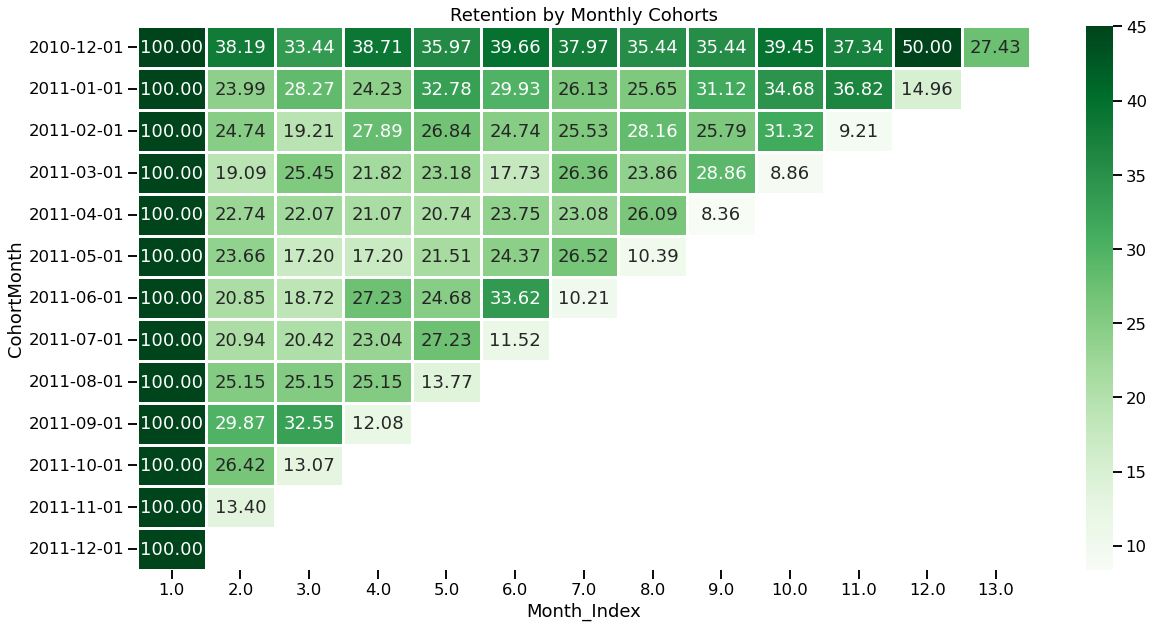

In [59]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11", "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", "Oct '11", "Nov '11", "Dec '11"]
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention.round(2), annot = True, cmap = "Greens", vmax = list(retention.max().sort_values(ascending = False))[1]-5, fmt = '.2f', linewidth = 1.43)
plt.show()

## RFM Analysis for Customer Segmentation

### What is RFM analysis?

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

![](https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

**Calculate RFM values** <br>
Let's calculate recency, frequency and monetary values. Also we will assume that we want cluster our customers into 5 segments.

In [60]:
calculating_date = max(df.InvoiceDate) + dt.timedelta(days = 1) # We assume that we are doing this analysis 1 day after from latest transaction on the data.

In [61]:
calculating_date

Timestamp('2011-12-10 12:50:00')

In [65]:
df.query('CustomerID==12346')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount,BillMonth,CohortMonth,Month_Index,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-01,2011-01-01,1.0,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,2011-01-01,2011-01-01,1.0,-77183.6


In [62]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [63]:
data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (calculating_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

data

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [66]:
data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [67]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)

recency_groups = pd.qcut(data['Recency'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(data['Frequency'], q=5, labels=frequency_labels)

data = data.assign(R=recency_groups.values, F=frequency_groups.values)
data

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,5,5
12348.0,75,31,1797.24,2,3
12349.0,19,73,1757.55,4,4
12350.0,310,17,334.40,1,2
...,...,...,...,...,...
18280.0,278,10,180.60,1,1
18281.0,181,7,80.82,1,1
18282.0,8,13,176.60,5,1


In [69]:
monetary_labels = range(1, 6)
monetary_groups = pd.qcut(data['MonetaryValue'], q=5, labels=monetary_labels)

data = data.assign(M=monetary_groups)

data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data['RFM_Score'].head()
data

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,3
12347.0,2,182,4310.00,5,5,5,15
12348.0,75,31,1797.24,2,3,4,9
12349.0,19,73,1757.55,4,4,4,12
12350.0,310,17,334.40,1,2,2,5
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,13,176.60,5,1,1,7


In [70]:
def rfm_level(df):
    if df['RFM_Score'] >= 14:
        return 'Platinum Plus'
    elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14)):
        return 'Platinum'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return 'Gold'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Silver'
    else:
        return 'Bronze'

data['RFM_Level'] = data.apply(rfm_level, axis=1)

data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3,Bronze
12347.0,2,182,4310.00,5,5,5,15,Platinum Plus
12348.0,75,31,1797.24,2,3,4,9,Gold
12349.0,19,73,1757.55,4,4,4,12,Platinum
12350.0,310,17,334.40,1,2,2,5,Bronze


In [40]:
rfm_level_agg = data.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

rfm_level_agg

Recency Frequency MonetaryValue      
                 mean      mean          mean count
RFM_Level                                          
Bronze          218.2      11.7         187.4   905
Gold             71.3      48.7         857.2  1106
Platinum         33.0     113.8        1977.9   993
Platinum Plus     9.6     345.5        8037.9   612
Silver          115.7      23.7         395.7   756

## K-Means Clustering

Now we will try to cluster our customers with one of the most used clustering ML algorithm: K-Means! But before do that we have to know some details about K-Means. K-Means assumes your variables have symmetric distributions, they have same average values and same variance. So, we will prepare our data according to this assumptions. 

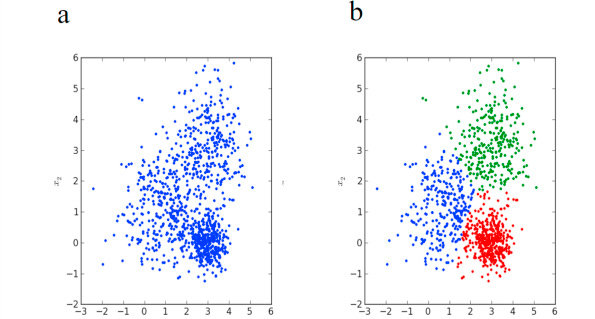

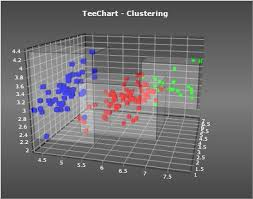

C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

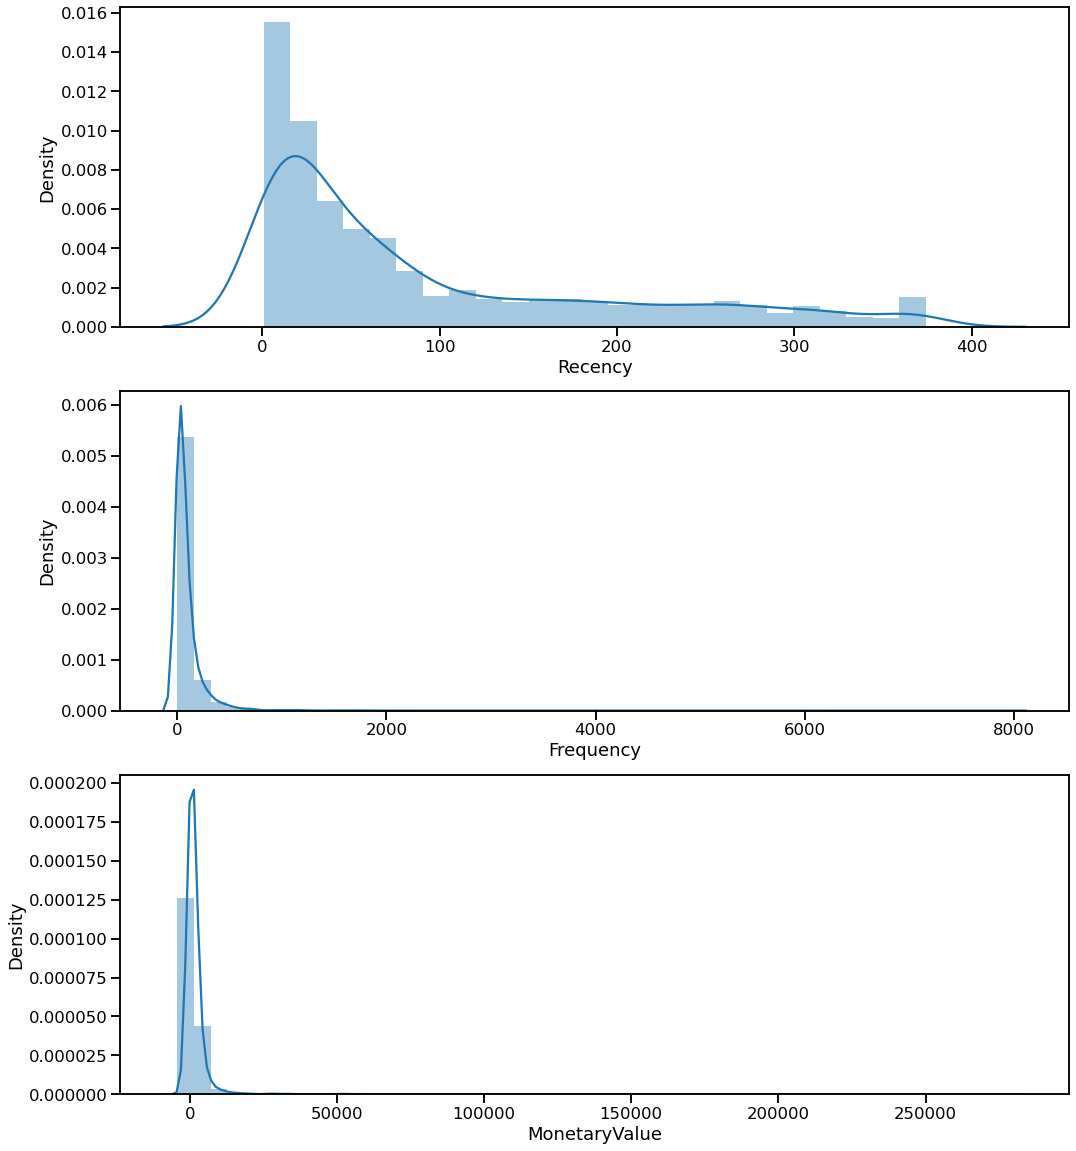

In [71]:
data_rfm = data[['Recency', 'Frequency', 'MonetaryValue']]

plt.figure(figsize = (17,20))
plt.subplot(3, 1, 1); sns.distplot(data_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_rfm['MonetaryValue'])
plt.show()

In [42]:
data_rfm.min()

Recency             1.00
Frequency           1.00
MonetaryValue   -4287.63
dtype: float64

Since we will apply log transformation we have to make all values positive.

In [72]:
data_rfm_positive = data_rfm
data_rfm_positive.MonetaryValue = data_rfm.MonetaryValue + abs(data_rfm.MonetaryValue.min()) + 1

C:\Users\bdaon\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
data_rfm_positive.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)
data_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.402917,-2.230272,-0.694689
12347.0,-2.075135,1.133419,1.216783
12348.0,0.399593,-0.186462,0.267050
12349.0,-0.537936,0.452198,0.249071
12350.0,1.368554,-0.634452,-0.488376
...,...,...,...
18280.0,1.294161,-1.030135,-0.581345
18281.0,1.001152,-1.296103,-0.643388
18282.0,-1.128562,-0.834493,-0.583806


C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

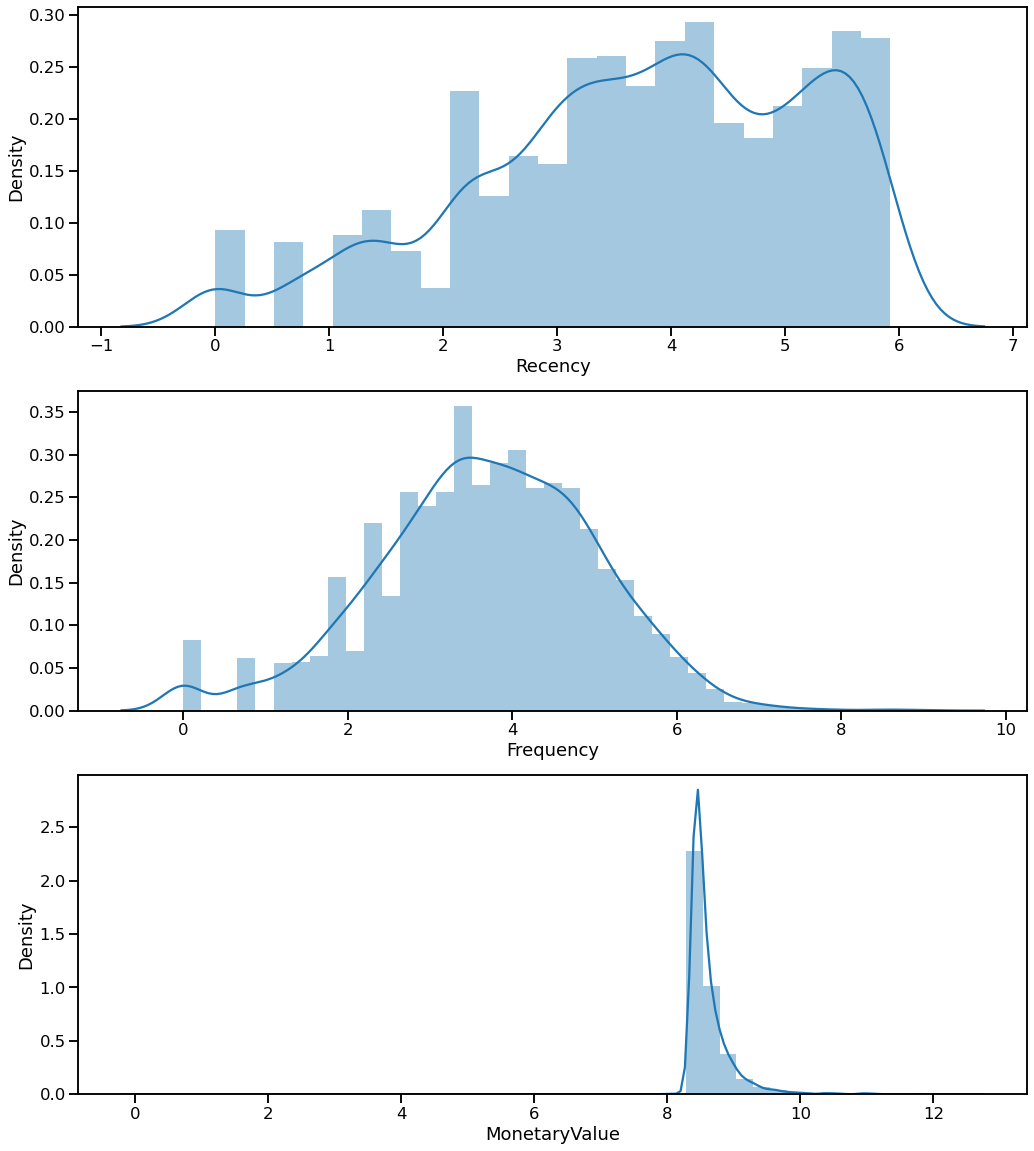

In [76]:
plt.figure(figsize = (17,20))
plt.subplot(3, 1, 1); sns.distplot(data_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_log['MonetaryValue'])
plt.show()

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

In [80]:
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
data_rfm_k5

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,4288.63,3
12347.0,2,182,8598.63,4
12348.0,75,31,6085.87,2
12349.0,19,73,6046.18,1
12350.0,310,17,4623.03,3
...,...,...,...,...
18280.0,278,10,4469.23,3
18281.0,181,7,4369.45,3
18282.0,8,13,4465.23,1


In [99]:
data_rfm_k5.query('Cluster==0')

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12415.0,24,778,128014.08,0
12433.0,1,420,17664.50,0
12471.0,2,531,23029.55,0
12477.0,23,308,17405.64,0
12540.0,20,481,17597.67,0
...,...,...,...,...
17735.0,2,690,17398.65,0
17841.0,2,7983,44629.41,0
17857.0,3,56,31051.97,0


In [81]:
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           9.9     815.2       42459.2    77
1          14.7      52.1        5086.9   938
2         107.7      69.6        5312.2  1405
3         183.3      11.4        4577.3  1229
4          15.6     253.7        8187.9   723

To find which 'k' value is more suitable for our data we will use elbow method.

In [82]:
sse = {}
for k in range(2, 15):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

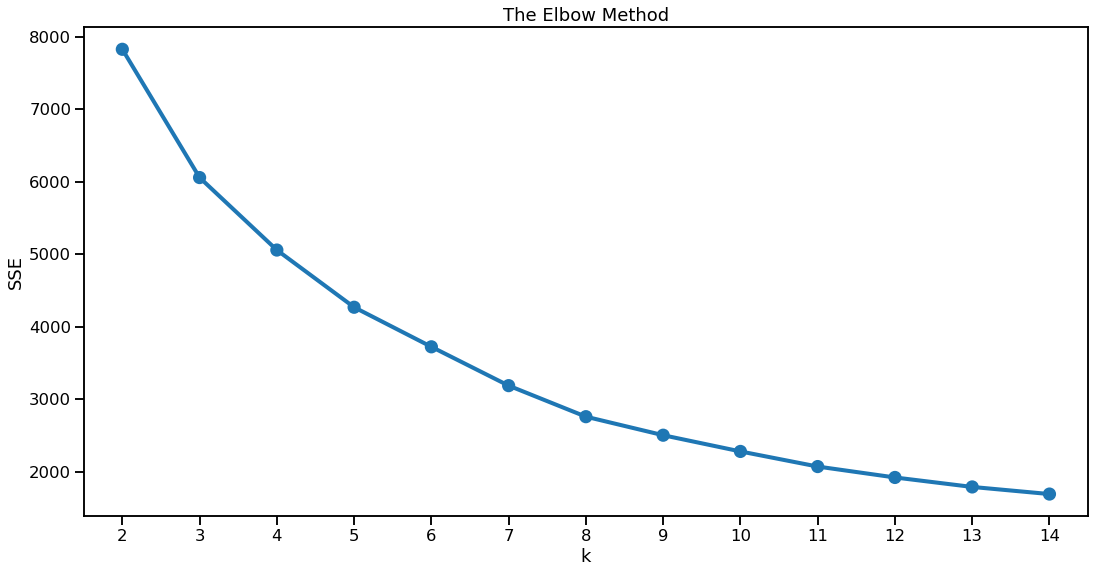

In [83]:
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

We can say 3 is the best k value.

In [84]:
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k3 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k3.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.5      97.5        5643.9  1915
1         163.4      22.0        4717.3  2037
2          13.1     417.2       15792.6   420

In [87]:
data_rfm_k3.reset_index()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,326,2,4288.63,1
1,12347.0,2,182,8598.63,2
2,12348.0,75,31,6085.87,1
3,12349.0,19,73,6046.18,0
4,12350.0,310,17,4623.03,1
...,...,...,...,...,...
4367,18280.0,278,10,4469.23,1
4368,18281.0,181,7,4369.45,1
4369,18282.0,8,13,4465.23,0
4370,18283.0,4,756,6383.51,2


In [85]:
data_melt = pd.melt(
                    data_rfm_k3.reset_index(),               
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Metric', value_name='Value'
                    )

In [88]:
data_melt

,CustomerID,Cluster,Metric,Value
0,12346.0,1,Recency,326.00
1,12347.0,2,Recency,2.00
2,12348.0,1,Recency,75.00
3,12349.0,0,Recency,19.00
4,12350.0,1,Recency,310.00
...,...,...,...,...
13111,18280.0,1,MonetaryValue,4469.23
13112,18281.0,1,MonetaryValue,4369.45
13113,18282.0,0,MonetaryValue,4465.23
13114,18283.0,2,MonetaryValue,6383.51


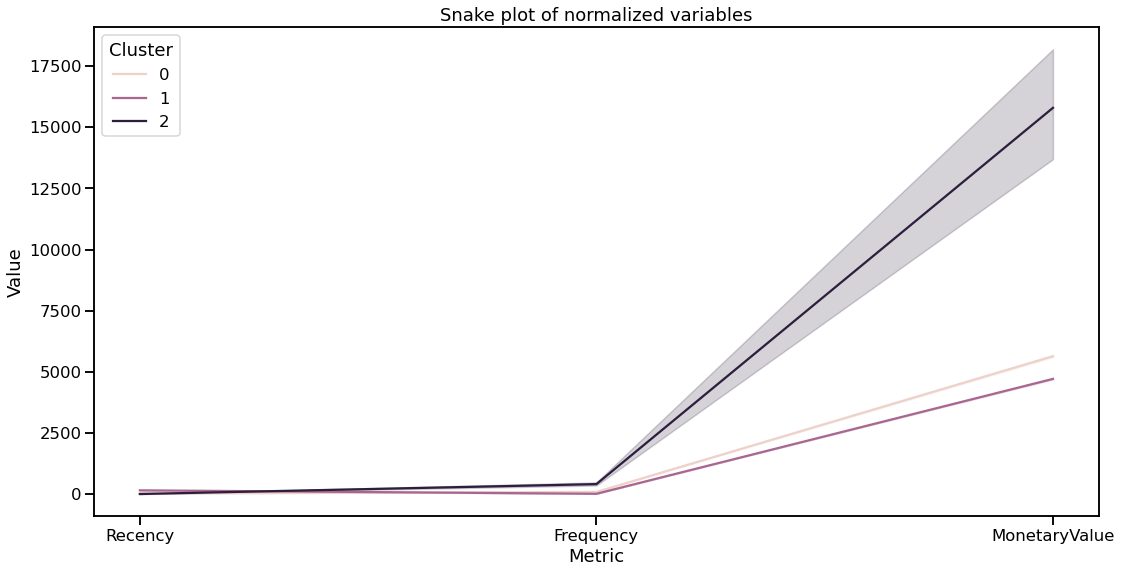

In [89]:
# Snake Plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

**Calculate relative importance of each attribute**<br>
Now we will calculate the relative importance of the RFM values within each cluster.

In [90]:
cluster_avg = data_rfm_k3.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.64,0.05,-0.09
1,0.77,-0.76,-0.24
2,-0.86,3.48,1.55


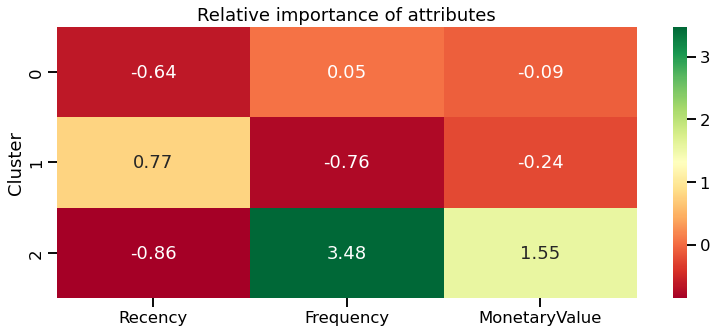

In [91]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [60]:
relative_imp.style.background_gradient(cmap='RdYlGn',axis=1)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.636070,0.048109,-0.087800
1,0.774720,-0.763386,-0.237562
2,-0.857216,3.483068,1.552504


### Tenure

In [92]:
tenure_list = []
for i in list(data_rfm.index):
    tenure_list.append((df.InvoiceDate.max() - df[(df.CustomerID == i)]['InvoiceDate'].min()).days + 1)

In [94]:
data_rfmt = data_rfm.assign(Tenure = tenure_list)
data_rfmt.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
Tenure           1.0
dtype: float64

In [95]:
data_rfmt_log = np.log(data_rfmt)
scaler = StandardScaler()
scaler.fit(data_rfmt_log)
data_rfmt_normalized = scaler.transform(data_rfmt_log)

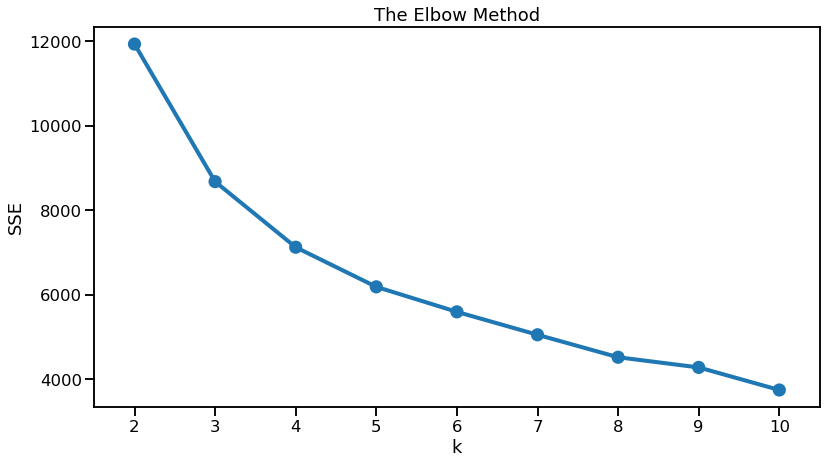

In [96]:
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_rfmt_normalized)
    sse[k] = kmeans.inertia_ 

plt.figure(figsize = (13,7))
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

3 or 4 ? 

In [97]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(data_rfmt_normalized)
cluster_labels = kmeans.labels_

In [98]:
data_rfmt_k4 = data_rfmt.assign(Cluster=cluster_labels)
grouped = data_rfmt_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          34.9      35.7        4808.2   50.2   936
1         192.4      24.7        4748.9  257.8  1634
2          11.7     478.0       19098.7  341.7   292
3          34.4     128.1        6101.3  277.6  1510